In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance, wasserstein_distance_nd
from tqdm import tqdm

100%|██████████| 1980/1980 [00:33<00:00, 59.52it/s]


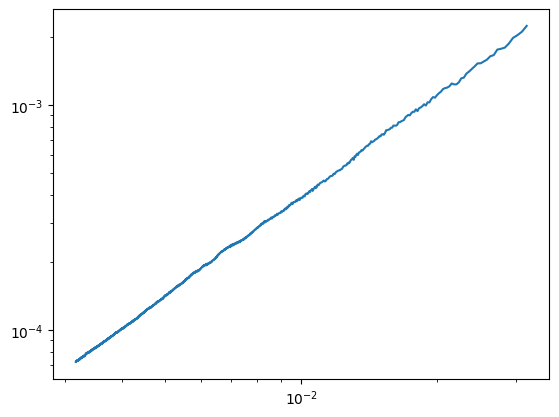

In [118]:
W1s = []
W2s = []

for N in tqdm(range(1000, 100000, 50)):
    indices = np.arange(0,N,dtype=np.longdouble)+0.5
    r = np.sqrt(indices/N)
    theta = np.pi * (1 + 5**0.5) * indices

    #data1 = np.array([r*np.cos(theta), r*np.sin(theta)]).T
    #data2 = np.array([r*np.cos(theta+np.pi), r*np.sin(theta+np.pi)]).T

    u_values = np.array(r*np.cos(theta))
    u_weights = None
    v_values = np.arange(-N,N,dtype=np.longdouble)/N
    v_weights = np.sqrt(1 - v_values**2)
    v_weights = v_weights/np.sum(v_weights)

    #W2s.append(wasserstein_distance_nd(data1, data2))
    W2s.append(1/np.sqrt(N))
    W1s.append(wasserstein_distance(u_values, v_values, u_weights, v_weights))

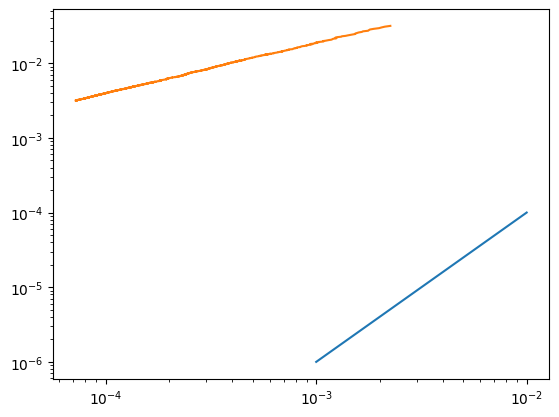

In [131]:
t = np.linspace(0.001,0.01,1000)
plt.loglog(t,t**2)
plt.loglog(W1s,W2s)

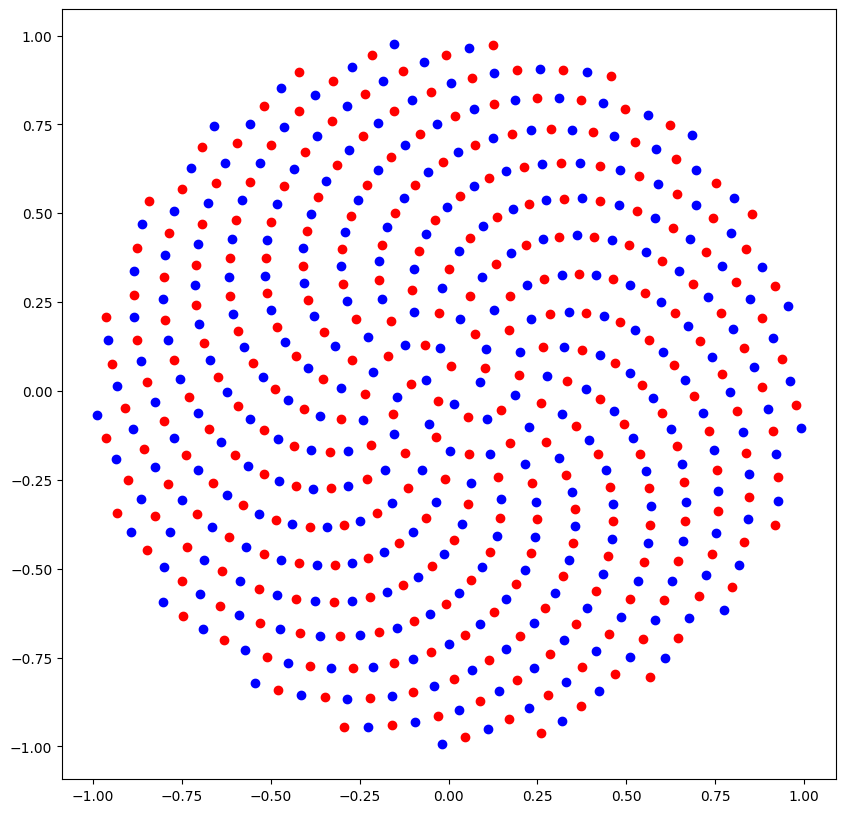

In [46]:
N = 300

indices = np.arange(0,N,dtype=float)+0.5
r = np.sqrt(indices/N)
theta = np.pi * (1 + 5**0.5) * indices

data1 = np.array([r*np.cos(theta), r*np.sin(theta)]).T
data2 = np.array([r*np.cos(theta+np.pi*(1+5**0.5)*0.5), r*np.sin(theta+np.pi*(1+5**0.5)*0.5)]).T

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
plt.scatter(*data1.T, color='b')
plt.scatter(*data2.T, color='r')
plt.show()